In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("F:\DCS-SEM 5\HR Lab\ex 7.xlsx" , sheet_name = 'Master' , header = 1)
df.head()

,Id,Name,Age,Position,HCRI,BARS
0,1,Emily Smith,32,Manager,0.820,Level 4
1,2,Liam Johnson,27,Analyst,0.875,Level 3
2,3,Olivia Brown,38,Employee,0.840,Level 2
3,4,Noah Davis,36,Supervisor,0.890,Level 2
4,5,Ava Wilson,32,Analyst,0.875,Level 3


Text(0.5, 1.0, 'Count of Each Bar Type')

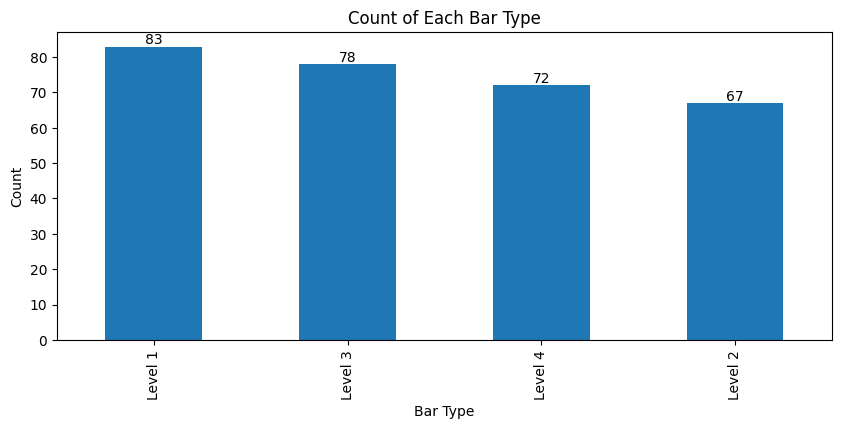

In [3]:
plt.figure(figsize = (10 , 4))
height = df['BARS'].value_counts()
ax = height.plot(kind='bar')

# Set labels and title
for i, count in enumerate(height):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Bar Type')
plt.ylabel('Count')
plt.title('Count of Each Bar Type')

Text(0.5, 1.0, 'Count of Each Position Type')

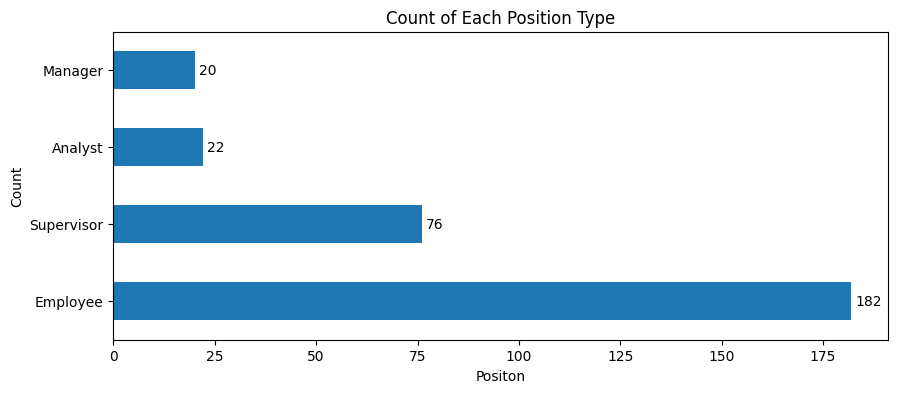

In [4]:
plt.figure(figsize = (10 , 4))
height = df['Position'].value_counts()
ax = height.plot(kind='barh')

# Set labels and title
for i, v in enumerate(height):
    ax.text(v + 1, i, str(v), color='black', va='center')
plt.xlabel('Positon')
plt.ylabel('Count')
plt.title('Count of Each Position Type')

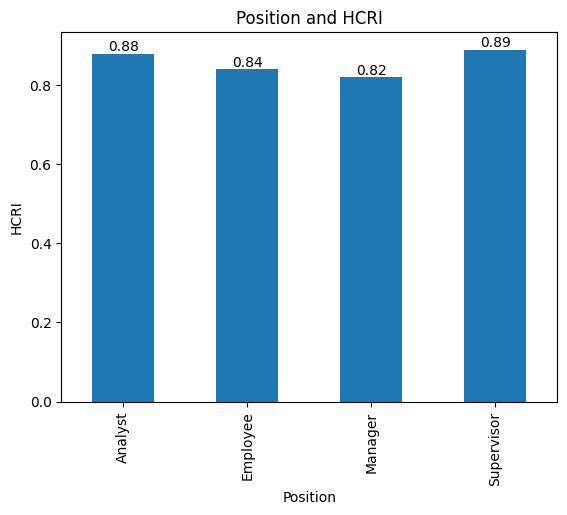

In [5]:
data = df.groupby('Position')['HCRI'].max().round(2)
ax = data.plot(kind = 'bar')
for i , v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Position')
plt.ylabel('HCRI')
plt.title('Position and HCRI')
plt.show()

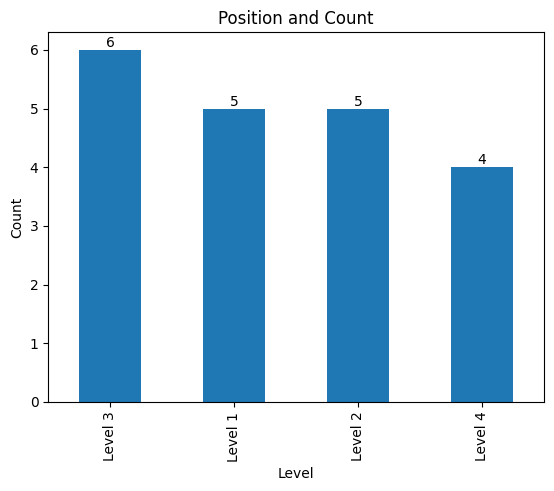

In [6]:
data = df['BARS'].where(df['Position'] == 'Manager').value_counts()
ax = data.plot(kind = 'bar')
for i , v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Position and Count')
plt.show()

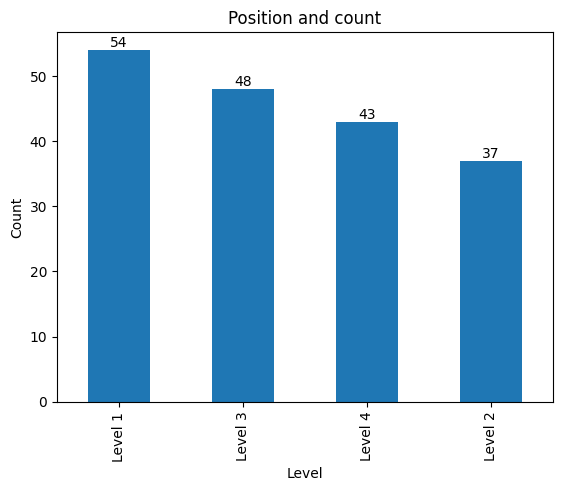

In [7]:
data = df['BARS'].where(df['Position'] == 'Employee').value_counts()
ax = data.plot(kind = 'bar')
for i , v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Position and count')
plt.show()

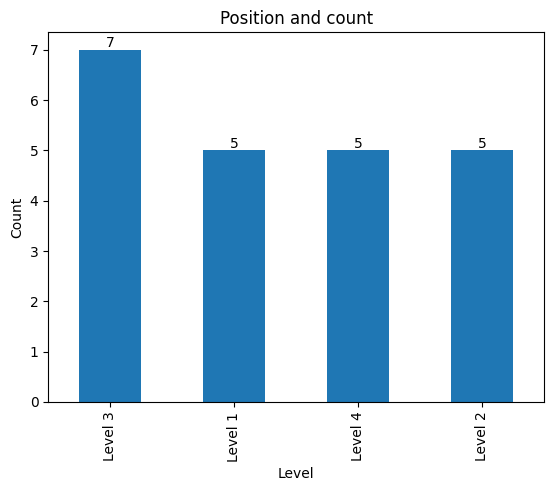

In [8]:
data = df['BARS'].where(df['Position'] == 'Analyst').value_counts()
ax = data.plot(kind = 'bar')
for i , v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Position and count')
plt.show()

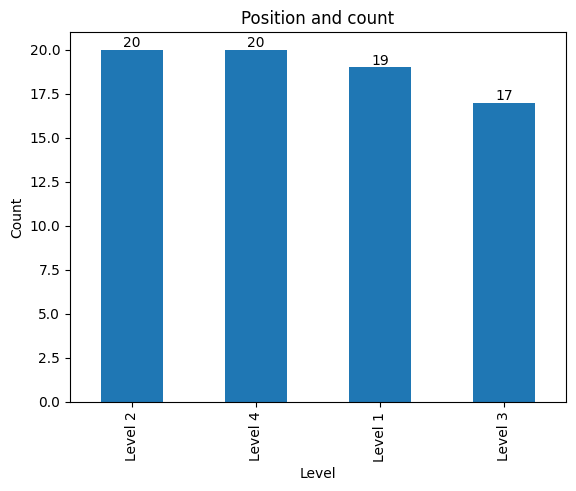

In [9]:
data = df['BARS'].where(df['Position'] == 'Supervisor').value_counts()
ax = data.plot(kind = 'bar')
for i , v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Position and count')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['BARS_'] = encoder.fit_transform(df['BARS'])
df.head()

,Id,Name,Age,Position,HCRI,BARS,BARS_
0,1,Emily Smith,32,Manager,0.820,Level 4,3
1,2,Liam Johnson,27,Analyst,0.875,Level 3,2
2,3,Olivia Brown,38,Employee,0.840,Level 2,1
3,4,Noah Davis,36,Supervisor,0.890,Level 2,1
4,5,Ava Wilson,32,Analyst,0.875,Level 3,2


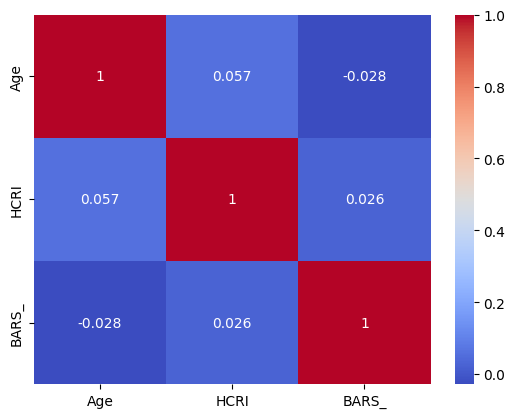

In [11]:
corr = df[['Age' , 'HCRI' , 'BARS_']].corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[['Age' , 'HCRI' , 'BARS_']]))

model = KMeans(n_clusters = 2 , random_state = 42  , n_init = 10)
model.fit(scaled_df)

df['Satisfied'] = model.labels_
df.head()

,Id,Name,Age,Position,HCRI,BARS,BARS_,Satisfied
0,1,Emily Smith,32,Manager,0.820,Level 4,3,0
1,2,Liam Johnson,27,Analyst,0.875,Level 3,2,1
2,3,Olivia Brown,38,Employee,0.840,Level 2,1,0
3,4,Noah Davis,36,Supervisor,0.890,Level 2,1,1
4,5,Ava Wilson,32,Analyst,0.875,Level 3,2,1


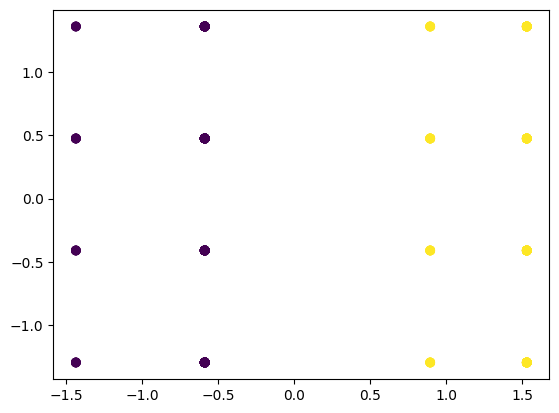

In [13]:
plt.scatter(scaled_df[1] , scaled_df[2] , c = df['Satisfied'])
plt.show()

In [14]:
df['Age'].where(df['Satisfied'] == 1).value_counts()

Age
32.0    16
38.0    14
36.0    12
34.0    10
30.0    10
33.0     8
27.0     6
31.0     6
29.0     6
35.0     4
28.0     4
37.0     2
Name: count, dtype: int64

In [15]:
df['Age'].where(df['Satisfied'] == 0).value_counts()

Age
27.0    26
38.0    22
37.0    22
32.0    20
34.0    18
31.0    16
29.0    16
28.0    16
30.0    14
36.0    12
33.0    10
35.0    10
Name: count, dtype: int64

In [16]:
df['Position'].where(df['Satisfied'] == 0).value_counts()

Position
Employee    182
Manager      20
Name: count, dtype: int64

In [17]:
df['Position'].where(df['Satisfied'] == 1).value_counts()

Position
Supervisor    76
Analyst       22
Name: count, dtype: int64

In [18]:
df['BARS'].where(df['Satisfied'] == 0).value_counts()

BARS
Level 1    59
Level 3    54
Level 4    47
Level 2    42
Name: count, dtype: int64

In [19]:
df['BARS'].where(df['Satisfied'] == 1).value_counts()

BARS
Level 2    25
Level 4    25
Level 3    24
Level 1    24
Name: count, dtype: int64

In [20]:
df['HCRI'].where(df['Satisfied'] == 1).value_counts()

HCRI
0.890    76
0.875    22
Name: count, dtype: int64

In [21]:
df['HCRI'].where(df['Satisfied'] == 0).value_counts()

HCRI
0.84    182
0.82     20
Name: count, dtype: int64